# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv(r"C:\Users\Jorge.Grisman\OneDrive - Quantum Health\jorge\courses.analyticsvidhya\Time-Series-Forecasting-using-Python-V2\8._prophet\data\train_data.csv")
valid_data = pd.read_csv(r"C:\Users\Jorge.Grisman\OneDrive - Quantum Health\jorge\courses.analyticsvidhya\Time-Series-Forecasting-using-Python-V2\8._prophet\data\valid_data.csv")

In [3]:
print(train_data.shape)
# train_data.head()

(578, 2)


In [4]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth', 8000,'display.max_columns',50):
              display(train_data.head(10))

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2
5,2012-08-30,3
6,2012-08-31,3
7,2012-09-01,4
8,2012-09-02,4
9,2012-09-03,4


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth', 8000,'display.max_columns',50):
              display(train_data.head(10))

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2
2012-08-30,2012-08-30,3
2012-08-31,2012-08-31,3
2012-09-01,2012-09-01,4
2012-09-02,2012-09-02,4


In [7]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

In [8]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth', 8000,'display.max_columns',50):
              display(valid_data.head(10))

,Date,count
Date,,
2014-03-26,2014-03-26,198
2014-03-27,2014-03-27,120
2014-03-28,2014-03-28,207
2014-03-29,2014-03-29,145
2014-03-30,2014-03-30,130
2014-03-31,2014-03-31,232
2014-04-01,2014-04-01,260
2014-04-02,2014-04-02,242
2014-04-03,2014-04-03,221


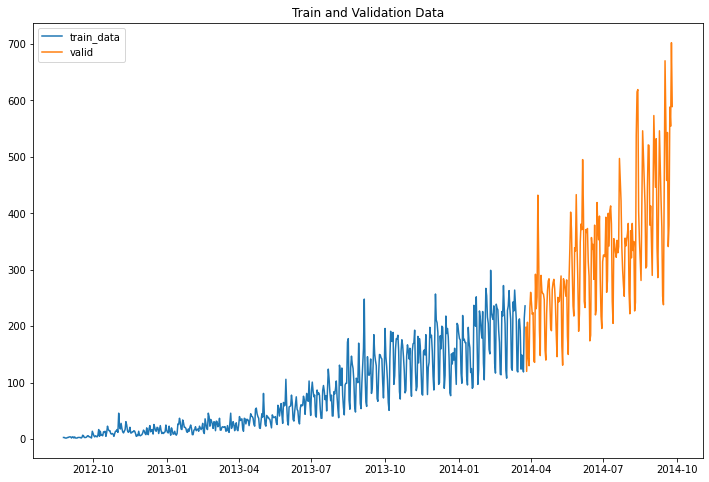

In [9]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Prophet

In [10]:
from fbprophet import Prophet

In [11]:
train_data.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [12]:
df = train_data[['Date', 'count']]

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [13]:
df.head()

,ds,y
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


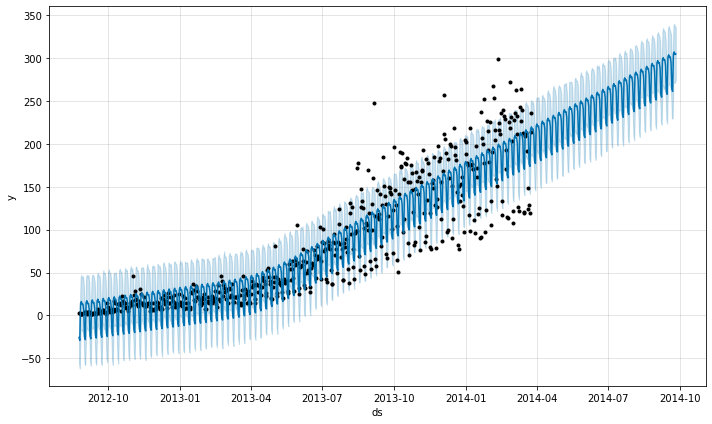

In [14]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=184,freq="D")
forecast = model.predict(future)
fig = model.plot(forecast)

In [15]:
train_data.shape, valid_data.shape

((578, 2), (184, 2))

In [16]:
len(forecast['yhat'][578:].values)

184

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,0.678107,-55.662891,4.272566,0.678107,0.678107,-26.344533,-26.344533,-26.344533,-26.344533,-26.344533,-26.344533,0.0,0.0,0.0,-25.666426
1,2012-08-26,0.808473,-61.962136,3.209890,0.808473,0.808473,-29.914341,-29.914341,-29.914341,-29.914341,-29.914341,-29.914341,0.0,0.0,0.0,-29.105867
2,2012-08-27,0.938840,-17.275700,44.090022,0.938840,0.938840,13.177281,13.177281,13.177281,13.177281,13.177281,13.177281,0.0,0.0,0.0,14.116121
3,2012-08-28,1.069206,-16.025130,47.594921,1.069206,1.069206,15.136127,15.136127,15.136127,15.136127,15.136127,15.136127,0.0,0.0,0.0,16.205333
4,2012-08-29,1.199573,-18.322632,43.016088,1.199573,1.199573,11.588062,11.588062,11.588062,11.588062,11.588062,11.588062,0.0,0.0,0.0,12.787635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2014-09-21,291.174139,229.319368,292.468631,282.614850,299.521740,-29.914341,-29.914341,-29.914341,-29.914341,-29.914341,-29.914341,0.0,0.0,0.0,261.259798
758,2014-09-22,291.654397,272.184455,337.459765,283.026800,300.066907,13.177281,13.177281,13.177281,13.177281,13.177281,13.177281,0.0,0.0,0.0,304.831678
759,2014-09-23,292.134654,272.045746,340.278915,283.409826,300.649896,15.136127,15.136127,15.136127,15.136127,15.136127,15.136127,0.0,0.0,0.0,307.270781
760,2014-09-24,292.614912,271.099118,336.806022,283.843309,301.213102,11.588062,11.588062,11.588062,11.588062,11.588062,11.588062,0.0,0.0,0.0,304.202974


In [25]:
train_data.shape

(578, 2)

In [26]:
valid_data.shape

(184, 3)

In [27]:
578 + 184

762

In [24]:
forecast['yhat'].shape

(762,)

In [18]:
valid_data['prophet'] =  forecast['yhat'][578:].values

In [28]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth', 8000,'display.max_columns',50):
              display(valid_data.head(10))

,Date,count,prophet
Date,,,
2014-03-26,2014-03-26,198,216.796079
2014-03-27,2014-03-27,120,217.519779
2014-03-28,2014-03-28,207,210.694430
2014-03-29,2014-03-29,145,180.304257
2014-03-30,2014-03-30,130,177.214706
2014-03-31,2014-03-31,232,220.786586
2014-04-01,2014-04-01,260,223.225690
2014-04-02,2014-04-02,242,220.157882
2014-04-03,2014-04-03,221,220.881583


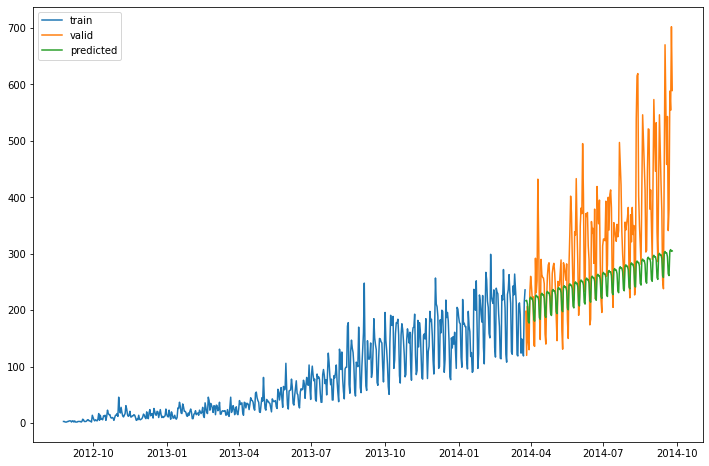

In [29]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['prophet'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [30]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['prophet']))
print('The RMSE value for Prophet is', rmse)

The RMSE value for Prophet is 118.61530887853647


In [33]:
# calculating Mean Absolute Error MAE
from sklearn.metrics import mean_absolute_error
mae =  mean_absolute_error(valid_data['count'], valid_data['prophet'])
print('The MAE value for Prophet is', mae)

The MAE value for Prophet is 87.82870962695031


In [31]:
forecast.index= forecast.ds

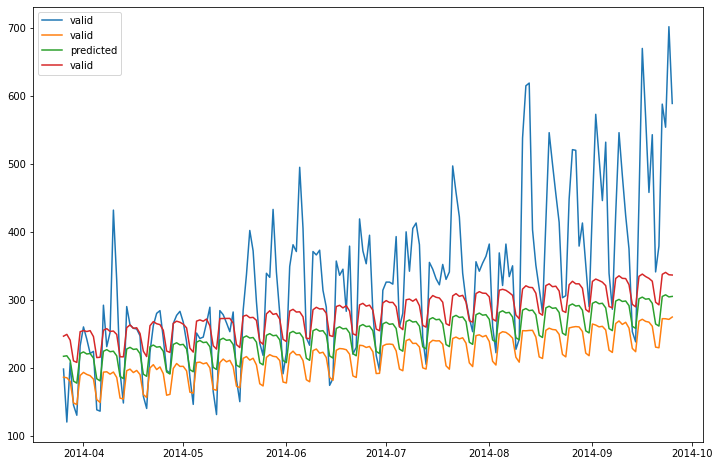

In [32]:
plt.figure(figsize=(12,8))

plt.plot(valid_data['count'],  label='valid') 
plt.plot(forecast['yhat_lower'][578:],  label='valid') 
plt.plot(forecast['yhat'][578:],  label='predicted') 
plt.plot(forecast['yhat_upper'][578:],  label='valid') 

plt.legend(loc='best') 
plt.show()